<a href="https://colab.research.google.com/github/kirangang/capstone_project1/blob/main/shine_webscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import time

In [ ]:
html_text=requests.get('https://www.shine.com/job-search/data-science-jobs').text
soup=BeautifulSoup(html_text,'lxml')


In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://staticcand.shine.com/" rel="preconnect"/>
  <link href="https://analytics.htmedia.in/" rel="preconnect"/>
  <link href="https://connect.facebook.net/" rel="preconnect"/>
  <link href="https://www.googletagmanager.com/" rel="preconnect"/>
  <link href="https://www.google-analytics.com/" rel="preconnect"/>
  <link href="https://www.staticlearn.shine.com/" rel="preconnect"/>
  <link href="https://www.staticrect.shine.com/" rel="preconnect"/>
  <meta charset="utf-8"/>
  <title>
   Data Science Jobs | 1178 Data Science Job Vacancies in Nov 2023 - Shine.com
  </title>
  <meta content="1178 Data Science Jobs – Apply to the latest Data Science job openings in Top companies across top tier cities. Register and get a free job alert for Data Science jobs on your email id" name="description"/>
  <meta content="Data Science Jobs | 1178 Data Science Job Vacancies in Nov 2023 - Shine.com" property="og:title"/>
  <meta content="" property=

In [ ]:
jobs = soup.find_all('div', class_='jobCard_jobCard__jjUmu active white-box-border jobCard')
job_titles = []

for job in jobs:
    job_title = job.find('h2').a.text.strip()
    job_titles.append(job_title)
print(f"Job Title: {job_titles}")


Job Title: ['Data Scientist Vacancy']


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_jobs(url):
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, 'html.parser')
    job_listings = soup.find_all('div', class_='jobCard')

    job_titles = []
    company_names = []
    experience_list = []
    location_list = []

    for job in job_listings:
        job_title = job.find('h2').text.strip()
        company_name = job.find('div', class_='jobCard_jobCard_cName__mYnow').span.text.strip()
        experience = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t').text.strip()
        location = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2').text.strip()

        job_titles.append(job_title)
        company_names.append(company_name)
        experience_list.append(experience)
        location_list.append(location)

    return job_titles, company_names, experience_list, location_list

# Define the base URL
base_url = 'https://www.shine.com/job-search/data-science-jobs'

all_job_titles = []
all_company_names = []
all_experience_list = []
all_location_list = []

for page in range(1, 11):  # Replace 11 with the number of pages you want to scrape
    page_url = f'{base_url}?page={page}'  # Modify the URL as needed

    job_titles, company_names, experience_list, location_list = scrape_jobs(page_url)

    all_job_titles.extend(job_titles)
    all_company_names.extend(company_names)
    all_experience_list.extend(experience_list)
    all_location_list.extend(location_list)

data = {
    'Job Title': all_job_titles,
    'Company Name': all_company_names,
    'Experience': all_experience_list,
    'Location': all_location_list
}

df = pd.DataFrame(data)




In [ ]:
df

,Job Title,Company Name,Experience,Location
0,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Qatar, Asansol, Saudi Arabia, Dibrugarh..."
1,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Qatar, Saudi Arabia, Bhubaneswar, Jammu..."
2,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Katni, Qatar, Ratlam, Saudi Arabia, Jam..."
3,Data Scientist- Madhya Pradesh,THE FASHION COSMO,0 to 3 Yrs,Other Madhya Pradesh
4,Data Scientist- Assam,THE FASHION COSMO,0 to 3 Yrs,Other Assam
...,...,...,...,...
195,Data Scientist- Jaipur,THE FASHION COSMO,0 to 3 Yrs,Jaipur
196,Data Scientist- Bathinda,THE FASHION COSMO,0 to 3 Yrs,Bathinda
197,Data Scientist- Haryana,THE FASHION COSMO,0 to 3 Yrs,Other Haryana
198,Data Scientist- Punjab,THE FASHION COSMO,0 to 3 Yrs,Other Punjab


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_jobs(url):
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, 'html.parser')
    job_listings = soup.find_all('div', class_='jobCard')

    job_titles = []
    company_names = []
    experience_list = []
    location_list = []
    position_list = []

    for job in job_listings:
        job_title = job.find('h2').text.strip()
        company_name = job.find('div', class_='jobCard_jobCard_cName__mYnow').span.text.strip()
        experience = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t').text.strip()
        location = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2').text.strip()

        position_element = job.find('ul', class_='jobCard_jobCard_jobDetail__jD82J').find_all('li')[-1].text.strip()

        if position_element.isdigit():
            position = int(position_element)
        else:
            position = 0

        job_titles.append(job_title)
        company_names.append(company_name)
        experience_list.append(experience)
        location_list.append(location)
        position_list.append(position)

    return job_titles, company_names, experience_list, location_list, position_list

# Define the base URL
base_url = 'https://www.shine.com/job-search/data-science-jobs'

all_job_titles = []
all_company_names = []
all_experience_list = []
all_location_list = []
all_position_list = []

for page in range(1, 11):  # Replace 11 with the number of pages you want to scrape
    page_url = f'{base_url}?page={page}'  # Modify the URL as needed

    job_titles, company_names, experience_list, location_list, position_list = scrape_jobs(page_url)

    all_job_titles.extend(job_titles)
    all_company_names.extend(company_names)
    all_experience_list.extend(experience_list)
    all_location_list.extend(location_list)
    all_position_list.extend(position_list)

data = {
    'Job Title': all_job_titles,
    'Company Name': all_company_names,
    'Experience': all_experience_list,
    'Location': all_location_list,
    'Position': all_position_list
}

df = pd.DataFrame(data)






In [ ]:
df

,Job Title,Company Name,Experience,Location,Position
0,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Qatar, Asansol, Saudi Arabia, Dibrugarh...",0
1,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Qatar, Saudi Arabia, Bhubaneswar, Jammu...",0
2,Data Scientist Vacancy,Divya Interprises,0 to 4 Yrs,"Oman+14Katni, Qatar, Ratlam, Saudi Arabia, Jam...",0
3,Data Scientist- Madhya Pradesh,THE FASHION COSMO,0 to 3 Yrs,Other Madhya Pradesh,0
4,Data Scientist- Assam,THE FASHION COSMO,0 to 3 Yrs,Other Assam,0
...,...,...,...,...,...
195,Data Scientist- Jaipur,THE FASHION COSMO,0 to 3 Yrs,Jaipur,0
196,Data Scientist- Bathinda,THE FASHION COSMO,0 to 3 Yrs,Bathinda,0
197,Data Scientist- Haryana,THE FASHION COSMO,0 to 3 Yrs,Other Haryana,0
198,Data Scientist- Punjab,THE FASHION COSMO,0 to 3 Yrs,Other Punjab,0


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_jobs(url):
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, 'html.parser')
    job_listings = soup.find_all('div', class_='jobCard')

    job_titles = []
    company_names = []
    experience_list = []
    location_list = []
    more_info_list = []

    for job in job_listings:
        job_title_element = job.find('h2')
        job_title = job_title_element.text.strip()
        more_info_link = job_title_element.a['href']

        company_name = job.find('div', class_='jobCard_jobCard_cName__mYnow').span.text.strip()
        experience = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_jobIcon__3FB1t').text.strip()
        location = job.find('div', class_='jobCard_jobCard_lists_item__YxRkV jobCard_locationIcon__zrWt2').text.strip()


        job_titles.append(job_title)
        more_info_list.append(more_info_link)
        company_names.append(company_name)
        experience_list.append(experience)
        location_list.append(location)

    return job_titles, more_info_list, company_names, experience_list, location_list, position_list

# Define the base URL
base_url = 'https://www.shine.com/job-search/data-science-jobs'

all_job_titles = []
all_more_info_list = []
all_company_names = []
all_experience_list = []
all_location_list = []
all_position_list = []

for page in range(1, 11):  # Replace 11 with the number of pages you want to scrape
    page_url = f'{base_url}?page={page}'  # Modify the URL as needed

    job_titles, more_info_list, company_names, experience_list, location_list, position_list = scrape_jobs(page_url)

    all_job_titles.extend(job_titles)
    all_more_info_list.extend(more_info_list)
    all_company_names.extend(company_names)
    all_experience_list.extend(experience_list)
    all_location_list.extend(location_list)

data = {
    'Job Title': all_job_titles,
    'Company Name': all_company_names,
    'More Info': all_more_info_list,
    'Experience': all_experience_list,
    'Location': all_location_list,
}

df = pd.DataFrame(data)





In [ ]:
df

,Job Title,Company Name,More Info,Experience,Location
0,Data Scientist Vacancy,Divya Interprises,/jobs/data-scientist-vacancy-permanent/divya-i...,0 to 4 Yrs,"Oman+14Qatar, Asansol, Saudi Arabia, Dibrugarh..."
1,Data Scientist Vacancy,Divya Interprises,/jobs/data-scientist-vacancy-permanent/divya-i...,0 to 4 Yrs,"Oman+14Qatar, Saudi Arabia, Bhubaneswar, Jammu..."
2,Data Scientist Vacancy,Divya Interprises,/jobs/data-scientist-vacancy-permanent/divya-i...,0 to 4 Yrs,"Oman+14Katni, Qatar, Ratlam, Saudi Arabia, Jam..."
3,Data Scientist- Madhya Pradesh,THE FASHION COSMO,/jobs/data-scientist-madhya-pradesh-permanent/...,0 to 3 Yrs,Other Madhya Pradesh
4,Data Scientist- Assam,THE FASHION COSMO,/jobs/data-scientist-assam-permanent/the-fashi...,0 to 3 Yrs,Other Assam
...,...,...,...,...,...
195,Data Scientist- Jaipur,THE FASHION COSMO,/jobs/data-scientist-jaipur-permanent/the-fash...,0 to 3 Yrs,Jaipur
196,Data Scientist- Bathinda,THE FASHION COSMO,/jobs/data-scientist-bathinda-permanent/the-fa...,0 to 3 Yrs,Bathinda
197,Data Scientist- Haryana,THE FASHION COSMO,/jobs/data-scientist-haryana-permanent/the-fas...,0 to 3 Yrs,Other Haryana
198,Data Scientist- Punjab,THE FASHION COSMO,/jobs/data-scientist-punjab-permanent/the-fash...,0 to 3 Yrs,Other Punjab


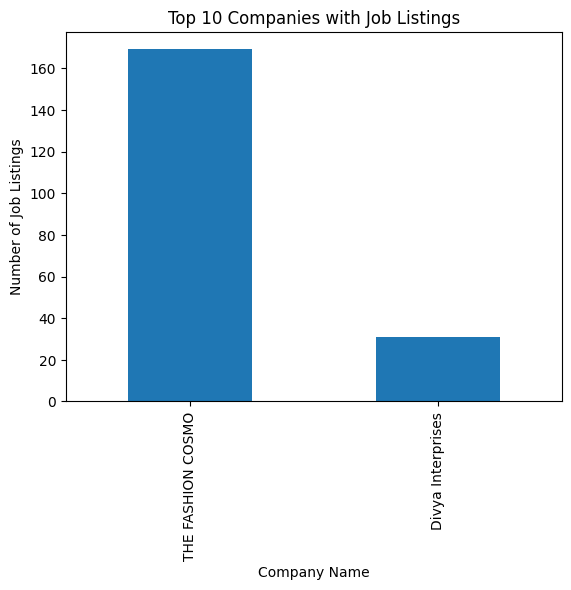

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already collected data and created the DataFrame 'df'

# Count the number of job listings per company
company_counts = df['Company Name'].value_counts()

# Create a bar chart for the top 10 companies
top_companies = company_counts.head(10)
top_companies.plot(kind='bar', title='Top 10 Companies with Job Listings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Listings')
plt.show()




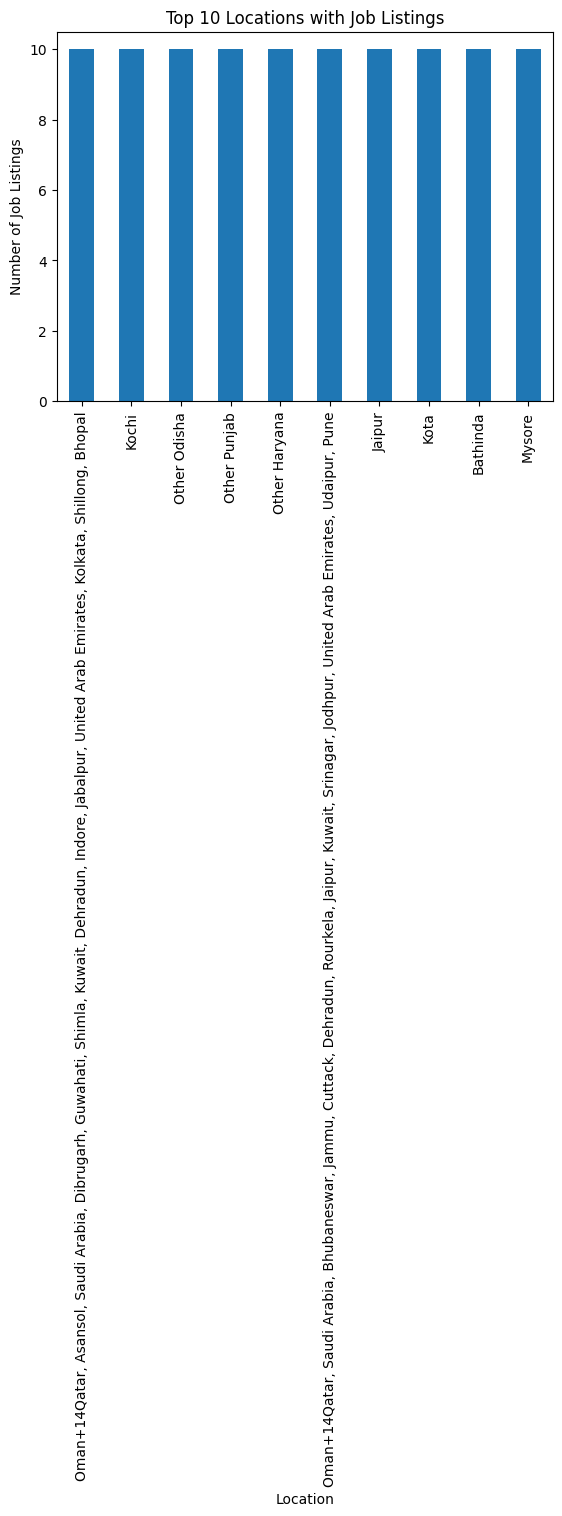

In [ ]:
# Count the number of job listings per location
location_counts = df['Location'].value_counts()

# Create a bar chart for the top 10 locations
top_locations = location_counts.head(10)
top_locations.plot(kind='bar', title='Top 10 Locations with Job Listings')
plt.xlabel('Location')
plt.ylabel('Number of Job Listings')
plt.show()

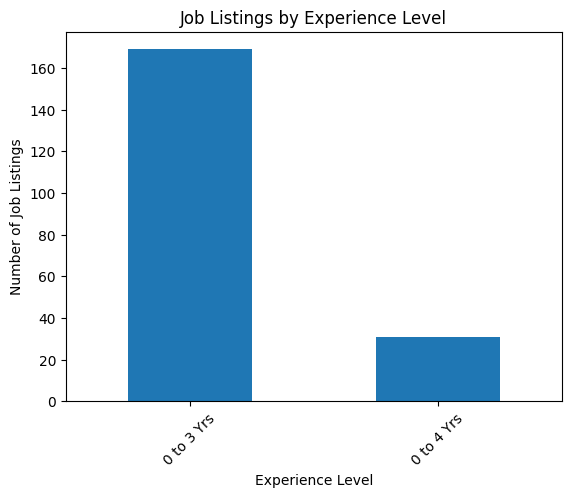

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already collected data and created the DataFrame 'df'

# Count the number of job listings per experience level
experience_counts = df['Experience'].value_counts()

# Create a bar chart for the experience distribution
experience_counts.plot(kind='bar', title='Job Listings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
